In [6]:
import pandas as pd

In [7]:
df= pd.read_csv('turkey_earthquake_tweets.csv')
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1624185742552403969,Gogoman,NaN,NaN,2012-12-26 12:08:27+00:00,369,2076.0,99630.0,False,2023-02-10 23:17:11+00:00,@simonkjaer1989 @acmilan @acmilanbr @acmilanar...,NaN,Twitter for Android,0.0,0.0,False
1,1624155272179580928,Crypto Dough Doe,"London, England",Get rich our die buying! $link,2019-11-13 23:30:36+00:00,1002,447.0,3798.0,False,2023-02-10 21:16:06+00:00,Hi People...any help here would be much apprec...,NaN,Twitter Web App,0.0,0.0,False
2,1624144833647415325,Eylem KILIÇ,NaN,⚕,2020-07-21 16:12:08+00:00,85,143.0,2737.0,False,2023-02-10 20:34:38+00:00,@JLo @intimissimi #TurkeyQuake we are in desp...,"['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']",Twitter for Android,0.0,0.0,False
3,1624123056372187143,bee | tarlos 🎗,NaN,NaN,2018-03-24 12:03:03+00:00,0,6.0,68704.0,False,2023-02-10 19:08:06+00:00,thank you rafael this means a lot 😭😭😭💜 #Turkey...,"['TurkeyQuake', 'türkiye', 'deprem']",Twitter for iPhone,0.0,0.0,False
4,1624121846479061019,Ameya,India,Life lead by curiousity & mind filled with que...,2017-10-26 16:20:28+00:00,29,146.0,106.0,False,2023-02-10 19:03:17+00:00,@adgpi Hey @BBCWorld try to cover these storie...,['TurkeyQuake'],Twitter for iPhone,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28839,1629145875841798144,𝕽𝖔𝖇 ☘ ᚏᚑᚔᚁᚓᚐᚏᚇ,Northern Ireland,Full-time rare bastard. I stream on Twitch and...,2019-08-28 14:42:05+00:00,75,142.0,1372.0,False,2023-02-24 15:46:59+00:00,Alright lads I'll be going live in fifteen min...,NaN,Twitter Web App,3.0,4.0,False
28840,1629143368348364806,Athens Democracy Forum,"Athens, Greece","Bringing together leaders, thinkers, and exper...",2019-06-03 14:14:44+00:00,1675,602.0,454.0,False,2023-02-24 15:37:01+00:00,Photo of the week: The aftermath of the devast...,NaN,Twitter Web App,0.0,0.0,False
28841,1629143010817482753,Raindrop Foundation Austin,NaN,Raindrop Foundation Austin is a nonprofit corp...,2015-01-21 00:26:24+00:00,107,275.0,62.0,False,2023-02-24 15:35:36+00:00,"""Hope for Turkey: A Fundraiser for Earthquake ...",NaN,Twitter Web App,2.0,2.0,False
28842,1629134382584807425,محب الأمطار,NaN,NaN,2021-10-16 10:40:28+00:00,698,470.0,24237.0,False,2023-02-24 15:01:19+00:00,"O Allah, protect the people of Turkey and Syri...",NaN,Twitter for Android,3.0,7.0,False


In [3]:
unique_locations = df['user_location'].nunique()
print("Number of unique locations:", unique_locations)

Number of unique locations: 4865


In [6]:
top_locations = df['user_location'].value_counts().head(15)
print("Top 15 locations by frequency:")
print(top_locations)

Top 15 locations by frequency:
India                   852
Turkey                  538
Kurdistan, Worldwide    392
England                 342
United States           317
Pakistan                292
New Delhi, India        288
İstanbul, Türkiye       274
London, England         240
New Delhi               184
Mumbai, India           183
Venezuela               164
United Kingdom          161
Islamabad, Pakistan     157
Türkiye                 150
Name: user_location, dtype: int64


In [17]:
all_hashtags = df['hashtags'].explode().to_list()

# Display the combined array of hashtags
print(all_hashtags)

[nan, nan, "['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD']", "['TurkeyQuake', 'türkiye', 'deprem']", "['TurkeyQuake']", "['TurkeyQuake', 'SyriaNeedsHelp', 'helpSyrianPeople', 'earthquakeinsyria', 'ISRO', 'OperationDost']", nan, "['TurkeySyriaEarthquake', 'earthquaketurkey']", nan, nan, "['earthquakeinsyria', 'earthquaketurkey', 'EarthquakeTurkeySyria']", nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, "['Humanity', 'planet', 'disasters', 'CreativeSociety']", "['People', 'CreativeSociety']", nan, "['democracy', 'Yutube', 'CreativeSociety']", "['people']", "['People', 'CreativeSociety', 'life', 'Turkey', 'Syria']", "['People', 'CreativeSociety', 'life', 'Turkey', 'Syria']", "['humanity', 'CreativeSociety']", "['People', 'CreativeSociety', 'life', 'Turkey', 'Syria']", nan, "['Turkey', 'TurkeyQuake']", "['turkey', 'kahramanmaraş', 'deprem', 'türkiye', 'afad', 'earthquake', 'earthquaketurkey']", "['TurkeyEarthquake', 'earthquake', 'Turke

In [16]:
type(all_hashtags)

pandas.core.series.Series

In [21]:
import ast
df['hashtags'] = df['hashtags'].fillna("[]")
df['hashtags'] = df['hashtags'].apply(lambda x: ast.literal_eval(x))
all_hashtags = [hashtag for sublist in df['hashtags'] for hashtag in sublist]

# Display the combined list of hashtags
print(all_hashtags)


['TurkeyQuake', 'AhbapDernegi', 'hatay', 'AFAD', 'TurkeyQuake', 'türkiye', 'deprem', 'TurkeyQuake', 'TurkeyQuake', 'SyriaNeedsHelp', 'helpSyrianPeople', 'earthquakeinsyria', 'ISRO', 'OperationDost', 'TurkeySyriaEarthquake', 'earthquaketurkey', 'earthquakeinsyria', 'earthquaketurkey', 'EarthquakeTurkeySyria', 'Humanity', 'planet', 'disasters', 'CreativeSociety', 'People', 'CreativeSociety', 'democracy', 'Yutube', 'CreativeSociety', 'people', 'People', 'CreativeSociety', 'life', 'Turkey', 'Syria', 'People', 'CreativeSociety', 'life', 'Turkey', 'Syria', 'humanity', 'CreativeSociety', 'People', 'CreativeSociety', 'life', 'Turkey', 'Syria', 'Turkey', 'TurkeyQuake', 'turkey', 'kahramanmaraş', 'deprem', 'türkiye', 'afad', 'earthquake', 'earthquaketurkey', 'TurkeyEarthquake', 'earthquake', 'Turkey', 'earthquaketurkey', 'Syria', 'syriaearthquake', 'TurkeyQuake', 'Syrie', 'PreyforTurkey', 'TurkeyEarthquake', 'earthquakeinturkey', 'turkey', 'TurkeyQuake', 'earthquaketurkey', 'HelpTurkey', 'Turcja

In [22]:
from collections import Counter

top_hashtags = Counter(all_hashtags).most_common(10)
print("Top 10 hashtags by frequency:")
print(top_hashtags)


Top 10 hashtags by frequency:
[('TurkeyEarthquake', 6330), ('Turkey', 3840), ('TurkeyQuake', 2287), ('earthquaketurkey', 2040), ('earthquake', 1943), ('Syria', 1265), ('TurkeySyriaEarthquake', 1234), ('Turkiye', 752), ('earthquakeinturkey', 574), ('turkey', 542)]


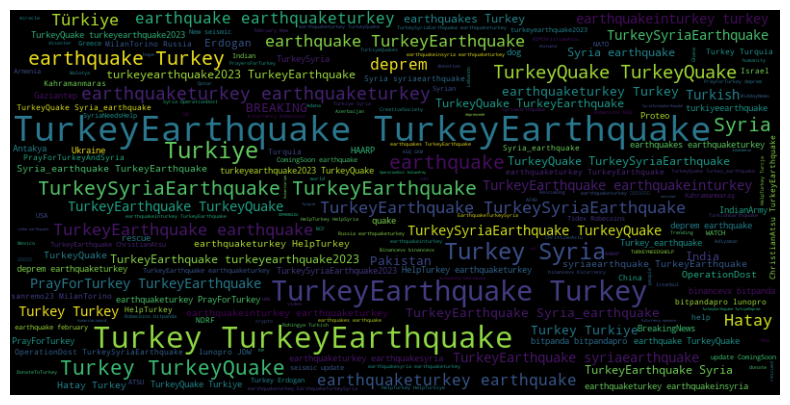

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

hashtag_wordcloud = WordCloud(width=800, height=400).generate(' '.join(all_hashtags))
plt.figure(figsize=(10, 5))
plt.imshow(hashtag_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [24]:
missing_values = df.isna().sum()

total_rows = len(df)
missing_ratio = (missing_values / total_rows) * 100  

missing_info = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values,
    'Missing Ratio (%)': missing_ratio
})

print(missing_info)

                            Column  Missing Values  Missing Ratio (%)
id                              id               0           0.000000
user_name                user_name               3           0.010401
user_location        user_location            8077          28.002358
user_description  user_description            2597           9.003606
user_created          user_created               0           0.000000
user_followers      user_followers               0           0.000000
user_friends          user_friends               1           0.003467
user_favourites    user_favourites               1           0.003467
user_verified        user_verified               1           0.003467
date                          date               1           0.003467
text                          text               1           0.003467
hashtags                  hashtags               0           0.000000
source                      source               2           0.006934
retweets            

In [3]:
pip install nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
                                              0.0/396.4 kB ? eta -:--:--
     -------------------                   204.8/396.4 kB 13.0 MB/s eta 0:00:01
     -------------------------------------- 396.4/396.4 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43343 sha256=ffc63878634218fbb9860edd489694321c164d475fc10d36c502b4da2bc35d2c
  Stored in directory: c:\users\bbsur\appdata\local\pip\cache\wheels\d2\10\44\6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\bbsur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [4]:
from nrclex import NRCLex

In [22]:
text =df['text'].head(5)
text[2]

'@JLo @intimissimi #TurkeyQuake  we are in desperate please help jennifer i love you #AhbapDernegi #hatay #AFAD'

In [36]:
emotion = NRCLex(text[4])


In [37]:
print(emotion.top_emotions)

[('trust', 0.4), ('positive', 0.4)]


In [38]:
print(emotion.raw_emotion_scores)

{'trust': 2, 'positive': 2, 'negative': 1}
